# SELF Demo

This notebook will provide a quick walkthrough and explanation of the SELF library for database generation and querying

In [1]:
# Import necessary libraries
using Catlab;
using Schema.QueryLib, Schema.Presentation, Schema.Interface;
import Schema.Presentation: Schema, sql;

## Define the Schema

The first step is to define the database schema by defining the **data types** and **tables**. These are presented as objects and homomorphisms of a category. 

In [2]:
Name = Ob(FreeAbBiRelMeetJoin, (:full_name, (first=String, last=String)));
Person = Ob(FreeAbBiRelMeetJoin, (:person, (id=Int,)));
X = Ob(FreeAbBiRelMeetJoin, Int);
F = Ob(FreeAbBiRelMeetJoin, Float64);
ID = Ob(FreeAbBiRelMeetJoin, (:ID, (id=Int,)));

types = [Name, Person, X,F,ID];

In [38]:
full_names = Hom((name=:names, fields=("person", "full_name")), Person, Name);
employees = Hom((name=:employees, fields=("person", "ID")), Person, ID);
customers = Hom((name=:customers, fields=("person", "ID")), Person, ID);
manager = Hom((name=:manager, fields=("person", "manager")), Person, Person);
salary = Hom((name=:salary, fields=("person", "salary")), Person, F);

tables = [full_names, employees, customers, manager, salary];

## Generate the Schema
We then create the schema and generate the commands for initializing the database

In [10]:
schema = Schema(types, tables);

In [11]:
prim, tab = sql(schema);
println(join(prim,"\n"));
println(join(tab, "\n"));

CREATE TYPE full_name as (first text, last text);
CREATE TYPE person as (id int);
-- primitive type int;
-- primitive type float4;
CREATE TYPE ID as (id int);
CREATE TABLE names ( person person, full_name full_name);
CREATE TABLE employees ( person person, ID ID);
CREATE TABLE customers ( person person, ID ID);
CREATE TABLE manager ( person person, manager person);
CREATE TABLE salary ( person person,salary float4);


## Create Queries
Now we can create queries for the database using our algebraic format

In [12]:
formula = dagger(full_names)⋅salary;

In [13]:
query(f) = make_query(schema, f).query;
println(query(formula));

SELECT DISTINCT A.full_name AS full_name,
B.salary AS salary
FROM (Select * from names) AS A
 INNER JOIN (Select * from salary) AS B ON
A.person=B.person


## Connect Directly to Database

In [14]:
conn = Connection("dbname=e3isd");

In [16]:
statement = prepare(conn, schema, dagger(full_names)⋅salary)
println(execute(statement, ["Bob", "Jones"]))

1×2 DataFrames.DataFrame
│ Row │ full_name   │ salary   │
│     │ String?     │ Float32? │
├─────┼─────────────┼──────────┤
│ 1   │ (Bob,Jones) │ 50000.0  │


In [25]:
using Catlab.WiringDiagrams

using Catlab.Graphics, Catlab.Doctrines
import Catlab.Graphics: Graphviz

In [18]:
show_diagram(d::WiringDiagram) = to_graphviz(d,
  orientation=LeftToRight,
  labels=true, label_attr=:xlabel,
  node_attrs=Graphviz.Attributes(
    :fontname => "Courier",
  ),
  edge_attrs=Graphviz.Attributes(
    :fontname => "Courier",
  )
)

show_diagram (generic function with 1 method)

In [23]:
w_names = to_wiring_diagram(formula)
show_diagram(w_names)

ErrorException: type BoxOp has no field value

In [32]:
A, B, C, D = Ob(FreeAbBiRelMeetJoin, :A, :B, :C, :D)
f = Hom(:f, Name, B)
g = Hom(:g, B, C)
h = Hom(:h, C, D)

h

In [33]:
f, g, h = to_wiring_diagram(f), to_wiring_diagram(g), to_wiring_diagram(h)
f

WiringDiagram{Catlab.Doctrines.AbelianBicategoryRelations.Hom}([(:full_name, (first = String, last = String))], [:B], 
[ 1 => {inputs},
  2 => {outputs},
  3 => Box(:f, [(:full_name, (first = String, last = String))], [:B]) ],
[ Wire((1,1) => (3,1)),
  Wire((3,1) => (2,1)) ])

In [39]:
show_diagram(to_wiring_diagram(salary))

Error: <stdin>: syntax error in line 19 near '"'


Catlab.Graphics.Graphviz.Graph("G", true, Catlab.Graphics.Graphviz.Statement[Catlab.Graphics.Graphviz.Subgraph("", Catlab.Graphics.Graphviz.Statement[Catlab.Graphics.Graphviz.Node("n1p1", OrderedCollections.OrderedDict{Symbol,Union{String, Catlab.Graphics.Graphviz.Html}}(:id => "in1")), Catlab.Graphics.Graphviz.Edge(Catlab.Graphics.Graphviz.NodeID[Catlab.Graphics.Graphviz.NodeID("n1p1", "", "")], OrderedCollections.OrderedDict{Symbol,Union{String, Catlab.Graphics.Graphviz.Html}}())], OrderedCollections.OrderedDict{Symbol,Union{String, Catlab.Graphics.Graphviz.Html}}(:rank => "source",:rankdir => "TB"), OrderedCollections.OrderedDict{Symbol,Union{String, Catlab.Graphics.Graphviz.Html}}(:style => "invis",:shape => "none",:label => "",:width => "0.333",:height => "0"), OrderedCollections.OrderedDict{Symbol,Union{String, Catlab.Graphics.Graphviz.Html}}(:style => "invis")), Catlab.Graphics.Graphviz.Subgraph("", Catlab.Graphics.Graphviz.Statement[Catlab.Graphics.Graphviz.Node("n2p1", Ordered

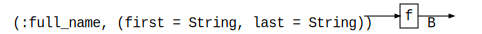

In [40]:
show_diagram(f)